# Data Science Intern

Lets Grow more

#Author - Harshika Tyagi

Task - (Prediction using Decision Tree Algorithm ) 


**Decision Tree Classifier**

The flowering plant iris has colourful, beautiful flowers. Our aim is to develop a decision tree classifier model that will categorise the dataset and forecast the suitable species for the input. Three different species of this plant are included within the dataset. Our product must thus belong to one of these three species.

The iris dataset has the following four attributes:

sepal length

sepal width

petal length

petal width


**Variable to be targeted: species (Iris-setosa, Iris-versicolor, Iris-virginica)**



**Problem Statement **

**Construct a decision tree classifier and display it graphically.**


**Importing libraries into notebook**

In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# For labelling
from sklearn.preprocessing import LabelEncoder

# For splitting dataset in for training and testing
from sklearn.model_selection import train_test_split

# Accuracy score
from sklearn.metrics import accuracy_score 

**Loading iris dataset into the notebook**

In [ ]:
#Getting Data form CSV
iris=pd.read_csv("/content/Iris (1).csv")
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


**Exploraratory Data Analysis (EDA)**

In [ ]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#Dropping the unnecessary column
iris = iris.drop('Id', axis = 1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# getting the basic describtion of the dataset
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking the info i.e. null values and the data type
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# shape of the data
iris.shape

(150, 5)

In [ ]:
# displayed columns
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#Checking the null Values is the dataset
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Checking correlation 
iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# count of the column species
iris.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Visualization**

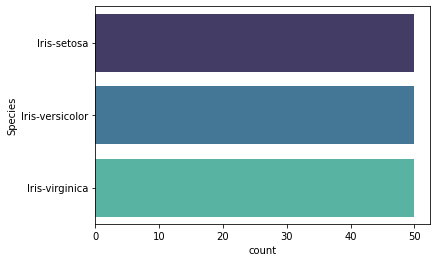

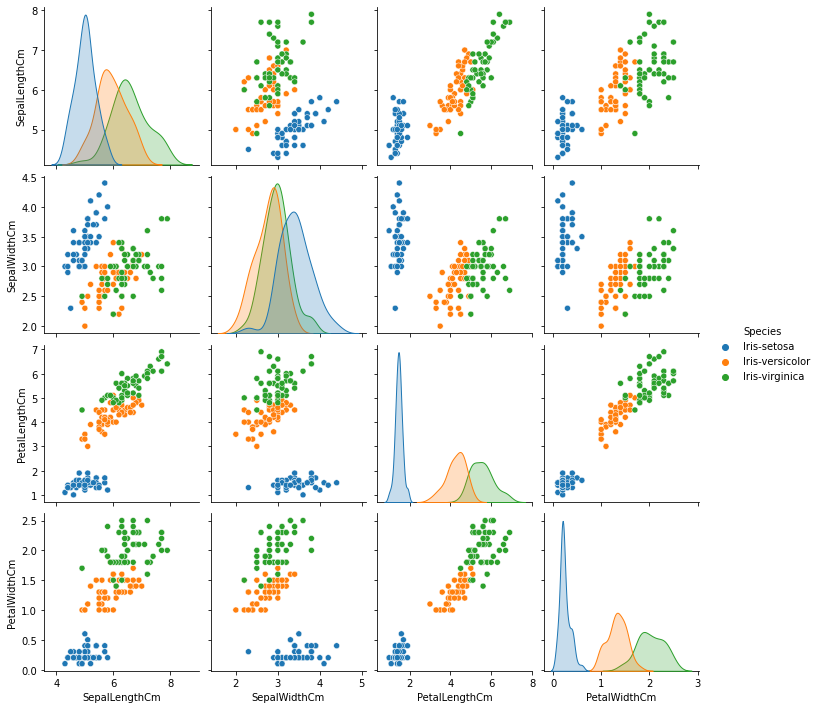

In [ ]:
# Plot for species column by count
sns.countplot(y= iris.Species, palette = "mako")

#plotting the pairplot
sns.pairplot(iris,hue='Species') 


**Inference**

In contrast to the other two species, an Iris-Setosa has a very different connection between pairs of characteristics.

The pairwise relations between the other two species, Iris-Versicolor and Iris-Virginia, overlap.

Hence, classifying Iris-Setosa among the three species would be rather simple. It would be significantly more difficult to classify iris-versicolor and iris-virginica.

<AxesSubplot:>

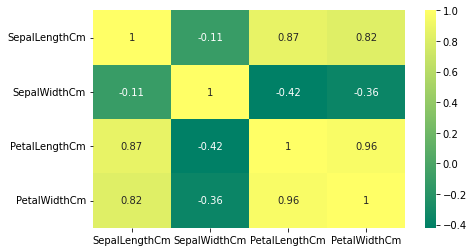

In [ ]:
#Plotting the heatmap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='summer')


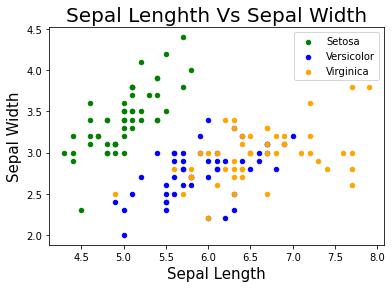

In [ ]:
#Sepal length VS Sepal Width
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'green', 
                                               label= 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'SepalLengthCm', y = 'SepalWidthCm',color = 'blue',
                                             label= 'Versicolor',ax = fig)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x= 'SepalLengthCm',y = 'SepalWidthCm',color = 'orange', 
                                            label= 'Virginica',ax = fig)
fig.set_xlabel("Sepal Length", fontsize =15)
fig.set_ylabel("Sepal Width", fontsize = 15)
fig.set_title("Sepal Lenghth Vs Sepal Width", fontsize= 20)
plt.show()

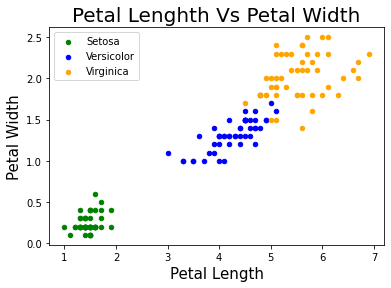

In [ ]:
#Petal length VS Petal Width
fig = iris[iris.Species == 'Iris-setosa'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'green', label= 'Setosa')
iris[iris.Species == 'Iris-versicolor'].plot.scatter(x= 'PetalLengthCm', y = 'PetalWidthCm', color = 'blue',
                                                     label= 'Versicolor',ax = fig)
iris[iris.Species == 'Iris-virginica'].plot.scatter(x= 'PetalLengthCm',y = 'PetalWidthCm', color = 'orange', 
                                                    label= 'Virginica',ax = fig)
fig.set_xlabel("Petal Length", fontsize = 15)
fig.set_ylabel("Petal Width", fontsize = 15)
fig.set_title("Petal Lenghth Vs Petal Width", fontsize = 20)
plt.show()

**Machine Learning**

Model Preparation

**Data Preprocessing (Correlation Matrix) To convert Categorical variable**

In [ ]:
# checking the correlation matrix of the categorical variables
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


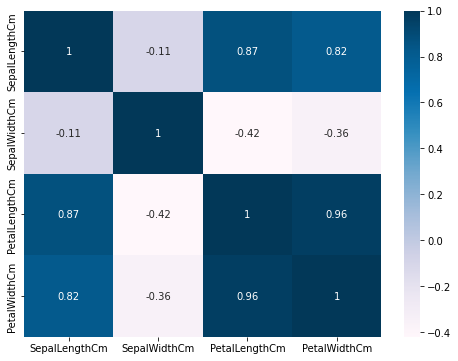

In [ ]:
# plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(iris.corr(),annot = True, cmap = 'PuBu')
plt.show()

In [ ]:
# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
LE = LabelEncoder()

In [ ]:
iris.iloc[:,-1] =  LE.fit_transform(iris.iloc[:,-1])
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Splitting the data into independent and dependent data**

In [ ]:
x =  iris.iloc[:,:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = iris.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

###Splitting the data set into train and test split

In [ ]:
# to split the data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.20, random_state = 50)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [ ]:
#shape of X_train and X_test
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [ ]:
#shape of Y_train and Y_test
print(Y_train.shape, Y_test.shape)

(120,) (30,)


#Model Builiding for decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()

In [ ]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

**Comparison Between Actual and Predicted output**

In [ ]:
Y_predicted= Model.predict(X_test)
Y_predicted

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [ ]:
Y_test = np.array(Y_test)
Y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [ ]:
predicted_final = pd.DataFrame( { 'Actual':  Y_test,
                            'Predicted': Model.predict( X_test) } )

In [ ]:
predicted_final.sample(n = 10)

,Actual,Predicted
19,1,2
28,1,1
21,1,1
2,0,0
12,0,0
27,1,1
4,2,2
0,1,1
20,2,2
23,2,2


In [ ]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [ ]:
metrics.accuracy_score(predicted_final.Actual, predicted_final.Predicted )

0.9666666666666667

**Accuracy of Decision Tree Model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_predicted, Y_test)

0.9666666666666667

**Confusion Matrics for Decision Tree Model**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_predicted,Y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

**Classification Report of Decision Tree Model**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_predicted, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Decision Tree Visualization**

In [ ]:
from sklearn import tree

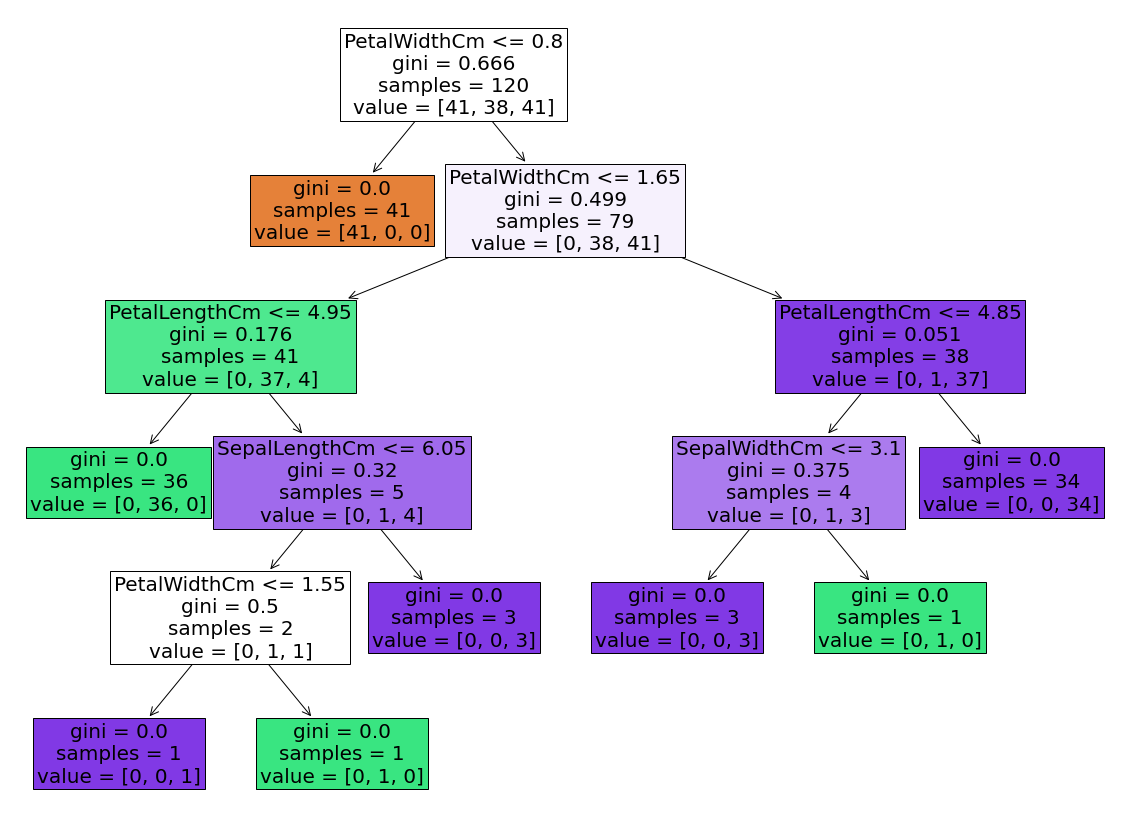

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,15))
tviz = tree.plot_tree(dt, feature_names = x.columns, filled = True,fontsize = 20)